In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Дата          301355 non-null  object
 1   Склад         301355 non-null  int64 
 2   Контрагент    301355 non-null  object
 3   Номенклатура  301355 non-null  object
 4   Количество    301355 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.5+ MB


Сразу переведем столбец "Дата" в правильный формат

In [6]:
df['Дата'] = pd.to_datetime(df['Дата'])

Сгруппируйте данные по дате, посчитайте количество продаж

In [8]:
grouped_df = df.groupby('Дата').size().reset_index(name='Количество продаж')

In [11]:
grouped_df = df.groupby('Дата')['Количество'].sum().reset_index(name='Количество продаж')

Вывести несколько первых строк сгруппированных данных

In [12]:
print(grouped_df.head())

        Дата  Количество продаж
0 2018-01-04               3734
1 2018-01-05               3643
2 2018-01-06               3193
3 2018-01-07               3298
4 2018-01-09               4055


Нарисуйте график продаж у `grouped_df`

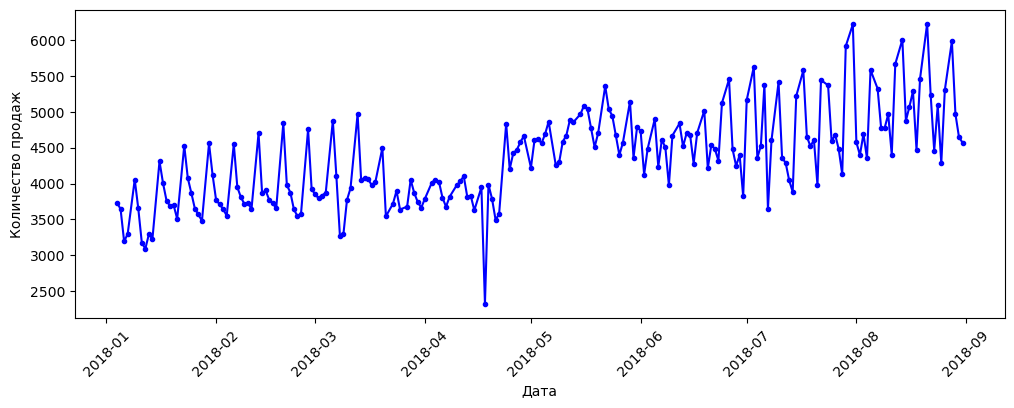

In [13]:
plt.figure(figsize=(12, 4))
plt.plot(grouped_df['Дата'], grouped_df['Количество продаж'], marker='o', markersize = 3,linestyle='-', color='blue')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.ylabel('Количество продаж')
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

In [7]:
Количество продаж достигло своего пика в январе 2018 года, превысив отметку в 1800 единиц, а к маю 2018 года снизилось до минимального уровня – 
менее 1200 единиц. В течение большей части периода продажи держались в диапазоне от 1400 до 1700, что указывает на относительную стабильность с
периодическими всплесками и падениями.

SyntaxError: invalid character '–' (U+2013) (265039407.py, line 1)

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [14]:
q1 = df['Количество'].quantile(0.25)
q3 = df['Количество'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[df['Количество'] > upper_bound]
max_outlier = outliers[outliers['Количество'] == outliers['Количество'].max()]
print("Строка с максимальным выбросом по количеству продаж:")
print(max_outlier)

Строка с максимальным выбросом по количеству продаж:
             Дата  Склад   Контрагент Номенклатура  Количество
218822 2018-06-28      1  address_208    product_0         200


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [28]:
chosen_df = df[(df['Дата'].dt.month.isin([6, 7, 8])) & (df['Дата'].dt.weekday == 2) & (df['Склад'] == 3)]
top_product = chosen_df.groupby('Номенклатура')['Количество'].sum().idxmax()
top_product_quantity = chosen_df.groupby('Номенклатура')['Количество'].sum().max()

print("Топовый товар:", top_product)
print("Топовое количество продажи:", top_product_quantity)

Топовый товар: product_1
Топовое количество продажи: 2267


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [38]:
weather = pd.read_csv('weather8.csv', delimiter=';')

In [39]:
weather = weather.rename(columns={'Date': 'Дата'})

In [40]:
weather['T'] = weather['T'].str.replace(',', '.').astype(float)

In [41]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Дата    2182 non-null   object 
 1   T       2182 non-null   float64
dtypes: float64(1), object(1)
memory usage: 34.2+ KB


In [48]:
weather['Дата'] = pd.to_datetime(weather['Дата'], format='%d-%m-%Y') 
result = weather.groupby('Дата', as_index=False)['T'].mean()
print(result)

          Дата        T
0   2018-01-01  -9.4625
1   2018-01-02  -9.5125
2   2018-01-03 -11.4625
3   2018-01-04 -14.0750
4   2018-01-05 -16.8625
..         ...      ...
268 2018-09-26  14.1750
269 2018-09-27  16.0750
270 2018-09-28  14.8875
271 2018-09-29   9.5500
272 2018-09-30  12.3375

[273 rows x 2 columns]


In [49]:
joined = pd.merge(grouped_df, result, on='Дата', how='inner')
print(joined.head())

        Дата  Количество продаж        T
0 2018-01-04               3734 -14.0750
1 2018-01-05               3643 -16.8625
2 2018-01-06               3193 -13.3000
3 2018-01-07               3298 -12.7500
4 2018-01-09               4055  -6.2500


In [50]:
result.head()

,Дата,T
0,2018-01-01,-9.4625
1,2018-01-02,-9.5125
2,2018-01-03,-11.4625
3,2018-01-04,-14.0750
4,2018-01-05,-16.8625


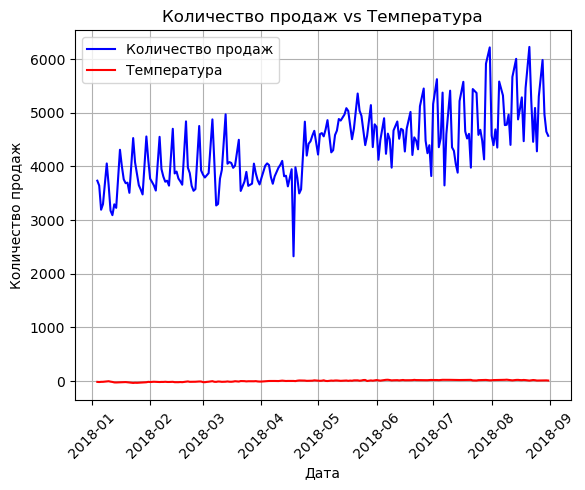

In [51]:
plt.plot(joined['Дата'], joined['Количество продаж'], linestyle='-', color='blue', label='Количество продаж')
plt.plot(joined['Дата'], joined['T'], linestyle='-', color='red', label='Температура')
plt.title("Количество продаж vs Температура")
plt.xlabel("Дата")
plt.ylabel("Количество продаж")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

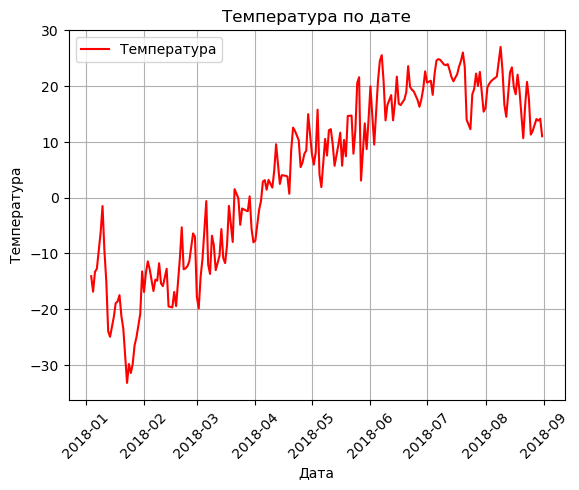

In [52]:
plt.plot(joined['Дата'], joined['T'], linestyle='-', color='red', label='Температура')
plt.title("Температура по дате")
plt.xlabel("Дата")
plt.ylabel("Температура")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()